## Estimacija matematičkog očekivanja


### Konvergencija aritmeticke sredine (srednje vrednosti uzoraka)

Demonstracija konvergencije aritmeticke sredine uzoraka $\overline X=\frac{X_1+\ldots+X_n}n$ ka matematickom ocekivanju $\mu$.

In [1]:
import ipywidgets as widgets
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np

def aritmeticka_sredina_plot(sigma,n,r):
# n: broj uzoraka
# r: broj eksperimenata
    
    x = range(1,n+1)
    for i in range(r):
        y = np.random.normal(0, sigma, n)
        m = np.cumsum(y)/x   # niz aritmetickih sredina, cumsum() vraca kumulativnu sumu, pa nju delimo sa odgovarajucim brojem uzoraka x
        plt.plot(x, m)
    
    # plotovanje krivih koje su +- jedna standardna devijacija (sigma/sqrt(n)) aritmeticke sredine
    z = sigma/np.sqrt(x)
    plt.plot(x, z,'k--')
    plt.plot(x, -z, 'k--')
    
    
    plt.gcf().set_size_inches(10,5)
    plt.grid()
    plt.show()    

In [2]:
widgets.interact(aritmeticka_sredina_plot,
                 sigma=widgets.IntSlider(min=0.1, max=10,description='Standardne devijacija', step=1, value=1),
                 n=widgets.IntSlider(min=10, max=1000,description='broj uzoraka', step=10, value=100),
                 r=widgets.IntSlider(min=1, max=10,description='broj eksperimenata', step=1, value=5))

interactive(children=(IntSlider(value=1, description='Standardne devijacija', max=10), IntSlider(value=100, de…

<function __main__.aritmeticka_sredina_plot(sigma, n, r)>

### Vezbanje: nacrtati slicne krive za druge raspodele: npr. Bernulijeva, eksponencijalna, uniformna, Poasonova...

## Interval poverenja ocene matematickog ocekivanja

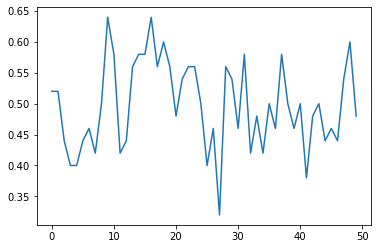

In [3]:
## za Bernulijevu SP - matematicko ocekivanje je verovatnoca uspeha p, varijansa je p(1-p)

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

p=0.5

broj_uzoraka = 50 # broj uzoraka za racunanje jedne aritmeticke sredine (srednje vrednosti, tj.  verovatnoce uspeha)
broj_uz_as=50 # broj uzoraka aritmetickih sredina

b= stats.bernoulli(p) # verovatnoca uspeha je p
xs = b.rvs(broj_uzoraka*broj_uz_as).reshape(broj_uzoraka,-1) 
uzorci_AS = np.mean(xs,axis=0) # uzorci aritmetickih sredina 
plt.plot(uzorci_AS)
plt.show()

In [4]:
# odredjivanje intervala poverenja za prvu ocenu uzorci_AS[0]:

# pretpostavljamo da znamo varijansu (kada je ne znamo, moramo da je ocenimo i tada se interv. poverenja racunaju pomocu t-raspodele)
var=p*(1-p)
std=var**0.5

alpha=0.05 #A   # nivo poverenja je 1-alpha=0.95

print(uzorci_AS[0])  # stampamo estimranu vrednost

# PRVI NACIN - SVODJENJE NA Z-RASPODELU (N(0,1))
red_kvantila=1-alpha/2     #B
Kvantil = stats.norm.ppf(red_kvantila)#C  # Kvantil odgovarajuceg reda Z raspodele (normalna (0,1) raspodela)
                  
margina = Kvantil * (std/broj_uzoraka**0.5) #D

interval_poverenja = (uzorci_AS[0] - margina, uzorci_AS[0] + margina) #output   
print(interval_poverenja)

# DRUGI NACIN:
margina1=stats.norm.ppf(red_kvantila, loc=0, scale=std/broj_uzoraka**0.5)

interval_poverenja1=(uzorci_AS[0] - margina1, uzorci_AS[0] + margina1) 
print(interval_poverenja1)

#TRECI NACIN - u jednoj komandi
interval_poverenja2=stats.norm.interval(0.95,loc=uzorci_AS[0], scale=std/broj_uzoraka**0.5)
print(interval_poverenja2)


0.52
(0.3814096175650322, 0.6585903824349678)
(0.3814096175650322, 0.6585903824349678)
(0.3814096175650322, 0.6585903824349678)


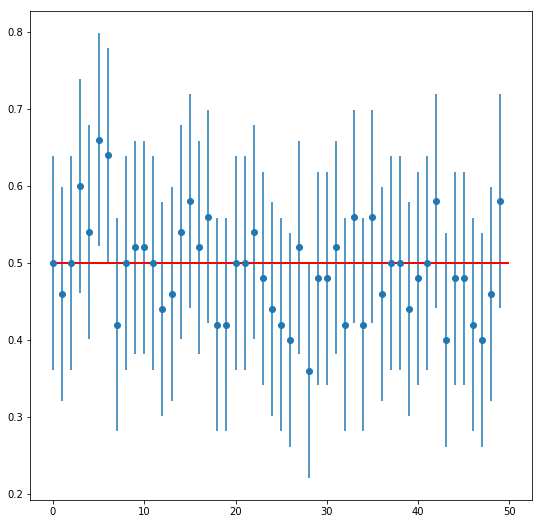

In [5]:
# za svaku ocenu dobijamo odgovarajuci 0.95 interval poverenja:

intervali_poverenja=[]
for i in range(0,broj_uz_as):
    intervali_poverenja.append((uzorci_AS[i] - margina, uzorci_AS[i] + margina))
    
# crtanje intervala poverenja:

plt.figure(figsize=(9,9))

# crtamo intervale pomocu plt.errorbar:
plt.errorbar(x=np.arange(0, broj_uz_as), 
             y=uzorci_AS[0:broj_uz_as], 
             yerr=[(gornja-donja)/2 for gornja,donja in intervali_poverenja],
             fmt='o')

plt.hlines(xmin=0, xmax=broj_uz_as,
           y=p, 
           linewidth=2.0,
           color="red")

plt.show()

### Vezbanje 1: Uraditi isto kada uzorke uzimamo iz normalne i eksponencijalne raspodele.

### Vezbanje 2: Ucitati podatke o temperaturi iz fajla temeprature.csv, izabrati grad, estimirati matematicko ocekivanje temperatura, i odrediti 90%, 95% i 99% intervale poverenja.

## Estimacija srednje vrednosti populacije iz uzorka



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

atributi = ['Detroit'] # uzimamo grad Detroit
df = pd.read_csv("temperature.csv",usecols=atributi)
df.head()
df.shape

(45253, 1)

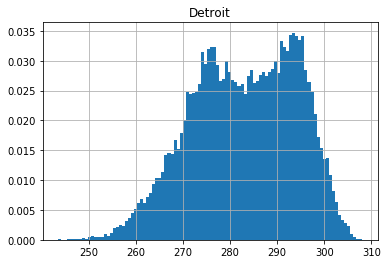

In [7]:
#histogram
hist = df.hist(normed=True,bins=100) 
plt.show()

In [8]:
df.describe() # ovom naredbom pandas automatski izracuna karakteristicne velicine na celoj populaciji

Detroit
count  45252.000000
mean     282.971668
std       11.034481
min      243.483333
25%      274.690000
50%      283.540000
75%      292.231250
max      308.050000

In [9]:
uzorak=df.sample(10)
uzorak.values.mean()

278.28416666669995

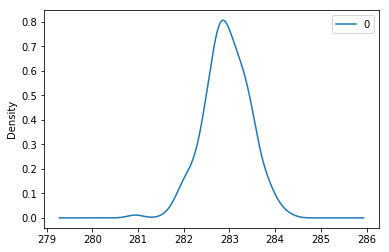

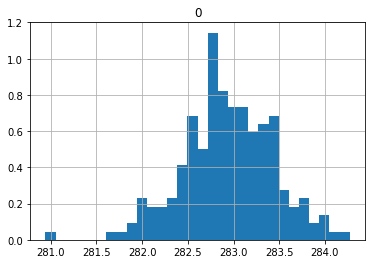

In [10]:
# hocemo da estimiramo srednju vrednost uzimajuci samo manji uzorak iz cele populacije:
estimatori_srednje_vrednosti = []       

velicina_uzorka=500
broj_estimacija_srednjih_vrednosti=200   # ovo je broj estimacija, svaki je baziran na uzorku velicine 'velicina_uzorka'
for x in range(broj_estimacija_srednjih_vrednosti):
    
    uzorak=df.sample(velicina_uzorka)
    estimatori_srednje_vrednosti.append( uzorak.values.mean() )
    
    # ili:
    #uzorak = np.random.choice(a= df.values, size=velicina_uzorka)
    #estimatori_srednje_vrednosti.append( uzorak.mean() )
    
# plotujemo estimaciju gustine verovatnoce raspodele srednjih vrednosti (pomocu histograma) - vidimo da je priblizno normalna!  
pd.DataFrame(estimatori_srednje_vrednosti).plot(kind="density")   

# histogram srednjih vrednosti:
hist = pd.DataFrame(estimatori_srednje_vrednosti).hist(normed=True,bins=30) 
plt.show()

In [1]:
# interval poverenja za ocenu srednje vrednosti:

std=df.std()['Detroit']

alpha=0.05   # nivo poverenja je 1-alpha=0.95

print(estimatori_srednje_vrednosti[0])  # stampamo estimranu vrednost

# PRVI NACIN - SVODJENJE NA Z-RASPODELU (N(0,1))
red_kvantila=1-alpha/2
Kvantil = stats.norm.ppf(red_kvantila)  # Kvantil odgovarajuceg reda Z raspodele (normalna (0,1) raspodela)
                  
margina = Kvantil * (std/velicina_uzorka**0.5)

interval_poverenja = (estimatori_srednje_vrednosti[0] - margina, estimatori_srednje_vrednosti[0] + margina)  
print(interval_poverenja)

NameError: name 'df' is not defined

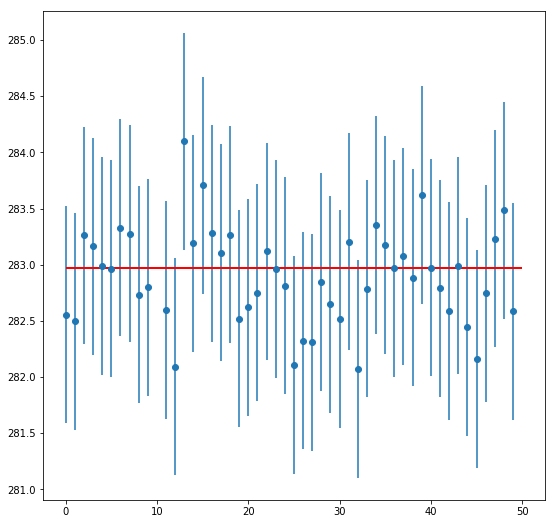

In [12]:
# crtanje svih intervala poverenja:

intervali_poverenja=[]
for i in range(0,50):
    intervali_poverenja.append((estimatori_srednje_vrednosti[i] - margina, estimatori_srednje_vrednosti[i] + margina))
    
# crtanje intervala poverenja:

plt.figure(figsize=(9,9))

# crtamo intervale pomocu plt.errorbar:
plt.errorbar(x=np.arange(0, 50), 
             y=estimatori_srednje_vrednosti[0:50], 
             yerr=[(gornja-donja)/2 for gornja,donja in intervali_poverenja],
             fmt='o')

plt.hlines(xmin=0, xmax=broj_uz_as,
           y=df.mean()['Detroit'], 
           linewidth=2.0,
           color="red")

plt.show()

## Interval poverenja ocene matematickog ocekivanja kada je NEPOZNATA VARIJANSA

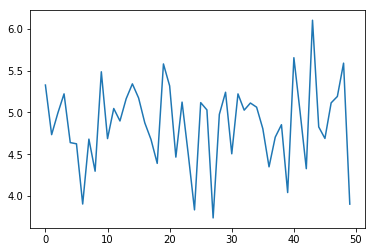

In [13]:
# u ovom slucaju se, kada je n relativno malo, umesto kvantila normalne raspodele uzimaju kvantili t-raspodele sa n-1 stepeni slobode (t(n-1))
# kada je n relativno veliko (vise od 30) radi se na isti nacin kao kad je poznata varijansa, 
#samo se umesto sigma uzima njena estimacija

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

m=5
sigma=3

broj_uzoraka = 25 # broj uzoraka za racunanje jedne aritmeticke sredine (srednje vrednosti, tj.  verovatnoce uspeha)
broj_uz_as=50 # broj uzoraka aritmetickih sredina

sp= stats.norm(m,sigma) # verovatnoca uspeha je p
xs = sp.rvs(broj_uzoraka*broj_uz_as).reshape(broj_uzoraka,-1) 
uzorci_AS = np.mean(xs,axis=0) # uzorci aritmetickih sredina 
plt.plot(uzorci_AS)
plt.show()

In [14]:
# odredjivanje intervala poverenja za prvu ocenu uzorci_AS[0]:

# ocena standardne devijacije:
uzorci_std = np.std(xs,axis=0,ddof=1) # uzorci ocena std. dev. 

alpha=0.05   # nivo poverenja je 1-alpha=0.95

print(uzorci_AS[0])  # stampamo estimranu vrednost

# PRVI NACIN - SVODJENJE NA Z-RASPODELU (N(0,1))
red_kvantila=1-alpha/2
Kvantil = stats.t.ppf(red_kvantila, df=broj_uzoraka-1)  # Kvantil odgovarajuceg reda Z raspodele (normalna (0,1) raspodela)
                  
margina = Kvantil * (uzorci_std[0]/broj_uzoraka**0.5)

interval_poverenja = (uzorci_AS[0] - margina, uzorci_AS[0] + margina)  
print(interval_poverenja)

# DRUGI NACIN:
margina1=stats.t.ppf(red_kvantila, df=broj_uzoraka-1, loc=0, scale=uzorci_std[0]/broj_uzoraka**0.5)

interval_poverenja1=(uzorci_AS[0] - margina1, uzorci_AS[0] + margina1) 
print(interval_poverenja1)

#TRECI NACIN - u jednoj komandi
interval_poverenja2=stats.t.interval(0.95,df=broj_uzoraka-1,loc=uzorci_AS[0], scale=uzorci_std[0]/broj_uzoraka**0.5)
print(interval_poverenja2)


5.32647756982
(4.135481828925851, 6.5174733107061229)
(4.135481828925851, 6.5174733107061229)
(4.135481828925851, 6.5174733107061229)


In [15]:
# kada bismo koristili normalnu raspodelu dobijamo malo uzi interval (vise optimisticna procena):

interval_poverenja3=stats.norm.interval(0.95,loc=uzorci_AS[0], scale=uzorci_std[0]/broj_uzoraka**0.5)
print(interval_poverenja3)


(4.1954584386994149, 6.457496700932559)


### Vezbanje 3: Ponoviti estimaciju srednje vrednosti populacije iz uzorka (npr. temperature), za manji obim uzorka (npr. n=20) - porediti intervale poverenja dobijene pomocu t-statistike i njene aproksimacije normalnom